# Calculate Free Cash Flow

## Setup

In [65]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [66]:
# Import libraries
import pandas as pd
import numpy as np

from investing.config.file_paths import input_data, output_data, financial_statements
from investing.tools.functions import cashflow_loader, sensitivity_plot

# Plottting libraries
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<IPython.core.display.Javascript object>

## Configure

In [67]:
# File names
companies_file = "company_names.csv"
cashflow_file = "CashFlow.xlsx"
ratios_file = "Ratios.xlsx"
price_file = "price.csv"
fcf_start_file = 'fcf_start_data.csv'

<IPython.core.display.Javascript object>

## Load Data

In [68]:
# Load company names
df_names = pd.read_csv(input_data / companies_file)

<IPython.core.display.Javascript object>

In [69]:
df_names

,ticker,name,type
0,ACN,Accenture,Regular
1,AQN,Algonquin,Regular
2,BABA,Alibaba,Regular
3,GOOG,Alphabet,Regular
4,ALA.TO,AltaGas,Regular
5,AMZN,Amazon.com,Regular
6,AAL,AngloAmerican,Regular
7,AAPL,Apple,Regular
8,T,AT&T,Regular
9,AY,Atlantica,Regular


<IPython.core.display.Javascript object>

## Build Company FCF

In [70]:
company_fcf = {}
mask = df_names["type"] == "Regular"
for name in df_names.loc[mask, "ticker"]:
    company_fcf[name] = cashflow_loader(financial_statements / cashflow_file, name)

<IPython.core.display.Javascript object>

## FCF Growth

### Growth Forecasts

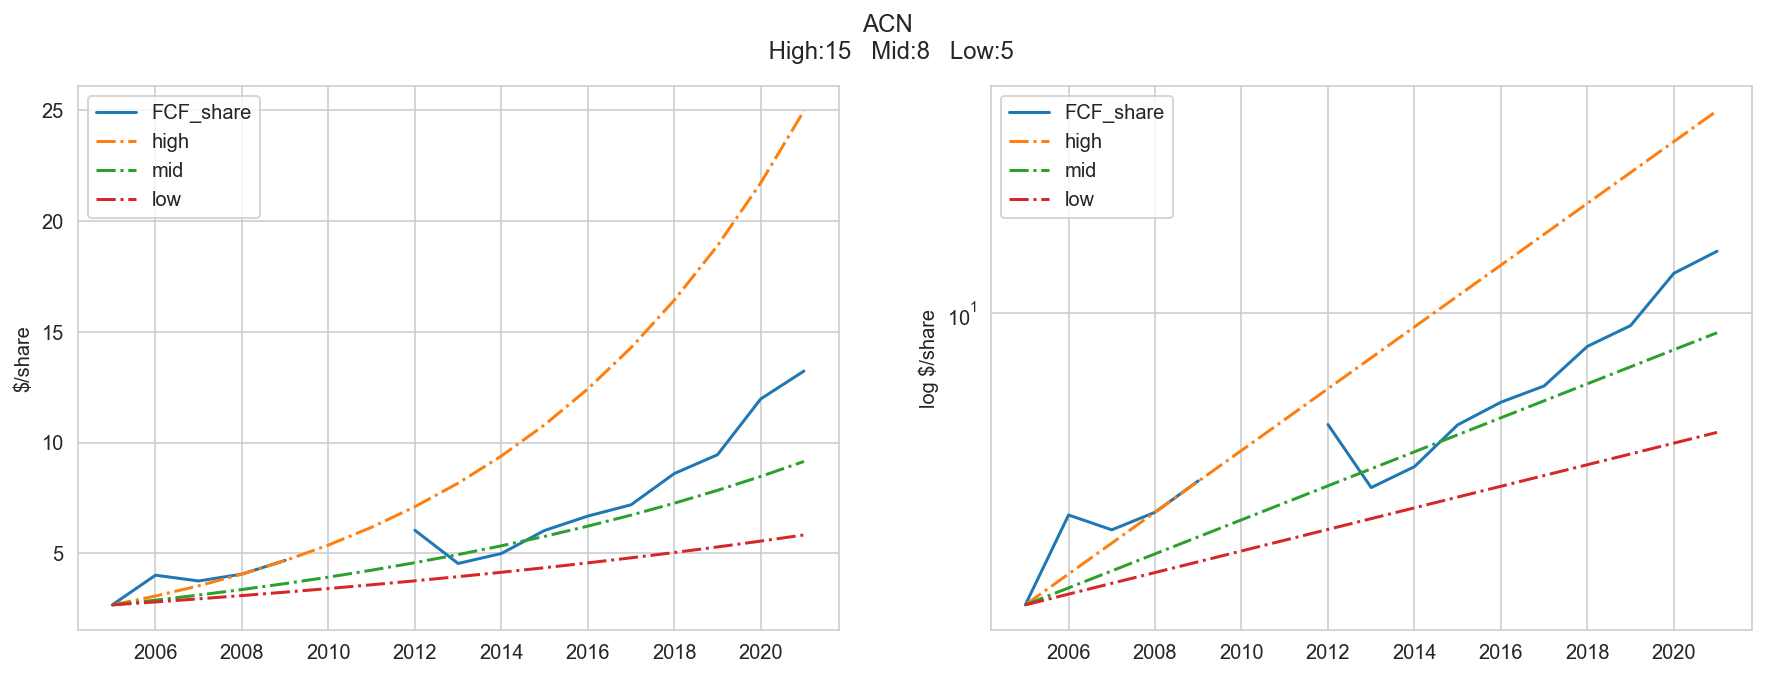

<IPython.core.display.Javascript object>

In [71]:
sensitivity_plot(company_fcf, "ACN", 15, 8, 5)

### FCF Starting Point Values

In [76]:
company_fcf['BIPC']

,FCF_share
2016,NaN
2017,NaN
2018,NaN
2019,NaN
2020,NaN
2021,NaN


<IPython.core.display.Javascript object>

In [86]:
fcf_dict = {}
for key, value in company_fcf.items():
    try:
        fcf_dict[key] = value.loc[value.last_valid_index(), "FCF_share"]
        df_start = pd.DataFrame.from_dict(
            data=fcf_dict, orient="index", columns=["start_value"]
        )
    except:
        print(key)

BIPC
BEPC


<IPython.core.display.Javascript object>

In [87]:
# Export to disk
df_start=df_start.reset_index().rename(columns={'index':'ticker'})
df_start.to_csv(output_data/fcf_start_file,index=False)

<IPython.core.display.Javascript object>